In [10]:
from typing_extensions import TypedDict


class State(TypedDict):
    noun: str
    verb: str
    pop_culture_reference: str
    cutaway: str

In [11]:
from langchain_ollama import ChatOllama

llm_model = ChatOllama(model="llama3.1:latest")

In [12]:
def generate_noun(state: State):
    noun = llm_model.invoke("Generate a random noun. Only return noun and nothing else").content
    return {"noun": noun}


def generate_verb(state: State):
    verb = llm_model.invoke(f"Generate a random verb. Only return verb and nothing else").content
    return {"verb": verb}


def generate_pop_culture_reference(state: State):
    pop_culture_reference = llm_model.invoke("Generate a random pop culture reference.Only return result and nothing else").content
    return {"pop_culture_reference": pop_culture_reference}

def create_cutaway(state: State):
    cutaway = llm_model.invoke(f"""
        Create a family guy cutaway using the following inouts.
        Noun: {state['noun']}
        Verb: {state['verb']}
        Pop Culture reference: {state['pop_culture_reference']}
    """).content
    return {"cutaway": cutaway}



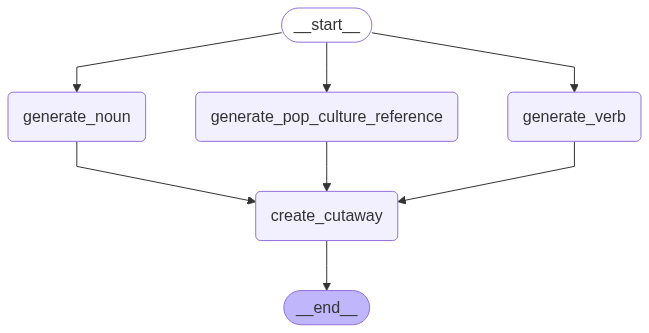

In [13]:
# from langgraph.constants import START
from langgraph.graph import StateGraph, START, END

graph_builder = StateGraph(State)

# nodes
graph_builder.add_node("generate_noun", generate_noun)
graph_builder.add_node("generate_verb", generate_verb)
graph_builder.add_node("generate_pop_culture_reference", generate_pop_culture_reference)
graph_builder.add_node("create_cutaway", create_cutaway)

#edges

graph_builder.add_edge(START, "generate_noun")
graph_builder.add_edge(START, "generate_verb")
graph_builder.add_edge(START, "generate_pop_culture_reference")

graph_builder.add_edge("generate_noun","create_cutaway")
graph_builder.add_edge( "generate_verb","create_cutaway")
graph_builder.add_edge("generate_pop_culture_reference","create_cutaway")

graph_builder.add_edge("create_cutaway", END)
graph = graph_builder.compile()
graph



In [15]:
results = graph.invoke({})
results

{'noun': 'Piano',
 'verb': 'Whisper',
 'pop_culture_reference': 'The Dude abides.',
 'cutaway': 'Here\'s a Family Guy-style cutaway gag:\n\n(Cut to Peter sitting at a piano, wearing a bathrobe and slippers)\n\nPeter: (to himself) Ah, the sweet sound of the piano. It\'s like music to my ears...\n\n(Cut to a flashback sequence where Peter is in a Western saloon, sipping on a White Russian)\n\nPeter: (whispering to himself) I\'m just gonna sit back, relax, and let the notes of this here piano wash over me... (he looks up at the bartender) You know what they say, "The Dude abides."\n\n(Bartender gives him a confused look)\n\nBartender: Uh, okay... What\'s that supposed to mean?\n\nPeter: (whispering again) It means I\'m gonna sit here all day and let my worries fade away like the notes on this piano...\n\n(Cut back to Peter sitting at the piano in his living room, but now he\'s wearing a cowboy hat and boots)\n\nPeter: (singing) "The Dude abides... The Dude abides..."\n\n(Lois walks into t

In [14]:
from langgraph.graph import MessagesState
